In [8]:
%%html
<!-- RTL Fix the jupyter notebook 7  -->
<style>
    .jp-RenderedHTMLCommon {
        padding-top: 2em !important;
  }   
    .jp-RenderedHTMLCommon, .jp-RenderedHTMLCommon * {
        direction: rtl !important;
        text-align:right !important;
  }
    .jp-MarkdownCell .jp-InputArea-editor {
        direction: rtl !important; 
        text-align:right !important;
        padding-top: 2em !important;
  } 

 .jp-RenderedHTMLCommon code, .jp-RenderedHTMLCommon code span {
        text-align:left !important;
        direction: ltr !important;
        unicode-bidi: embed !important;

    }
    .jp-RenderedHTMLCommon pre:has(code) {
      direction: ltr !important;
      text-align: left!important;
    }

</style> 

In [12]:
%%html
<script>
(function() {
  // Create the toggle button
  const rtlButton = document.createElement("button");
  rtlButton.textContent = "Toggle LTR";
  rtlButton.id = "top-rtl-toggle";
  rtlButton.style.marginLeft = "8px";
  rtlButton.style.padding = "4px 10px";
  rtlButton.style.fontSize = "14px";
  rtlButton.style.cursor = "pointer";

  // State
  var rtlActive = false;

  // Styling function
  var applyStyleToEditor = (editor) => {
    if (!editor) return;
    var direction = getComputedStyle(editor).getPropertyValue('direction')=='rtl' ? 'ltr' : 'rtl';
    var text_align = getComputedStyle(editor).getPropertyValue('text-align')=='right' ? 'left' : 'right';
    editor.style.setProperty('direction', direction, 'important');
    editor.style.setProperty('text-align', text_align, 'important');
  };

  // Toggle logic
  rtlButton.onclick = () => {
    rtlActive = !rtlActive;
    rtlButton.textContent = rtlActive ? "Toggle LTR" : "Toggle RTL";
    document.querySelectorAll('.jp-MarkdownCell .jp-InputArea-editor').forEach(applyStyleToEditor);
    document.querySelectorAll('.jp-RenderedHTMLCommon code, .jp-RenderedHTMLCommon code span').forEach(applyStyleToEditor);
    document.querySelectorAll('jp-RenderedHTMLCommon, .jp-RenderedHTMLCommon *').forEach(applyStyleToEditor);
  };

  // Watch for focus into editing Markdown cells
  // document.addEventListener('focusin', (event) => {
  //   const editor = event.target.closest('.jp-MarkdownCell .jp-InputArea-editor');
  //    if (editor) applyStyleToEditor(editor);
  // });

  // Insert into top toolbar if not already present
  var insertIntoToolbar = () => {
    const toolbar = document.querySelector('.jp-NotebookPanel-toolbar');
    if (toolbar && !document.getElementById("top-rtl-toggle")) {
      toolbar.appendChild(rtlButton);
    } else {
      // Try again in a moment if toolbar isn't ready yet
      setTimeout(insertIntoToolbar, 300);
    }
  };

  insertIntoToolbar();
})();
</script>

# זכרון בפונקציות

### אג'נדה
- scope של פונקציות
- משתנים מקומיים וגלוביים
- העברת מידע לפונקציות

עד עכשיו התנסנו ברעיון הבסיסי של פונקציות - איך להגדיר אותן, איך לקרוא להן ואיך להשתמש בהן כדי לפרק בעיות ליחידות קטנות וברורות יותר. עכשיו נעשה צעד קדימה ונעמיק בכמה נושאים חשובים ביותר, שיעזרו לכם להבין טוב יותר איך פונקציות באמת פועלות בזכרון מאחורי הקלעים. 

## תזכורת: משתנים אקטואליים ופורמליים

כשמגדירים פונקציה אנחנו צריכים להגדיר את הפרמטרים (הקלט) שלה. בשלב הגדרת הפונקציה אין לפרמטרים האלו ערכים ספציפיים. ערכים ספציפיים יינתנו בעת הקריאה לפונקציה מאוחר יותר.
בכל פעם שקוראים לפונקציה מעבירים לה ערכים ספציפיים. ערכים אלו נקראים **פרמטרים אקטואליים**. למשל, בקטע הקוד להלן:

```python
def what(st, c):
    if c in st:
        return True
    else:
        return False
 
print(what("hello", "t"))
print(what("hello", "e"))
```
`st` ו-`c` הם פרמטרים פורמליים. בעת קריאה לפונקציה, למשל `what("hello", "t")` מועברים לה פרמטרים אקטואליים - "hello" ו-"t". הערך האקטואלי "hello" מוצב לתוך הפרמטר הפורמלי `st`, ואילו "t" מוצב לתוך `c`. 


## Scope

כפי שחלקכם אולי שמתם לב, לא כל משתנה שנגדיר יהיה זמין בכל מקום בתוכנית. הscope של משתנה מתאר את "תחום הראייה" שלו - כלומר, באילו חלקים של התוכנית ניתן לגשת אליו או להשתמש בו. 

בכל פעם שמריצים פונקציה, נוצר עבורה scope חדש ונפרד. בתוך הscope הזה חיים המשתנים המקומיים שלה - למשל, הפרמטרים שהוגדרו לפונקציה או משתנים שנוצרו בתוכה. משתנים אלו קיימים רק בזמן הריצה של הפונקציה, וברגע שהפונקציה מסתיימת - הם "נעלמים". מחוץ לפונקציה אנחנו לא יכולים לגשת אליהם ישירות, אלא רק לראות את התוצאה שהפונקציה מחזירה.

משתנים השייכים לפונקציה מסוימת נקראים משתנים מקומיים (local).
משתנים אשר לא שייכים לאף פונקציה נקראים משתנים גלובליים (global).

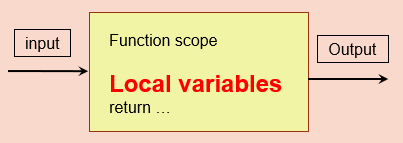

בואו נראה דוגמה לכך. 
הנה פונקציה שמגדירה משתנה בתוך הפונקציה.

In [1]:
def my_func():
    n=5

כעת נגדיר משתנה מחוץ לפונקציה בשם n:

In [ ]:
n=6

In [ ]:
import json
from jupyterquiz import display_quiz

example = \
'''
   [{
    
        "question": "מה הערך של המשתנה הלוקאלי n?",
        "type": "numeric",
        "answers": [
            {
                "type": "value",
                "value": 5,
                "correct": true,
                "feedback": "נכון!"
            },
            {
                "type": "default",
                "feedback": "לא נכון"
            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

In [ ]:
import json
from jupyterquiz import display_quiz

example = \
'''
   [{
    
        "question": "מה הערך של המשתנה הגלובלי n?",
        "type": "numeric",
        "answers": [
            {
                "type": "value",
                "value": 6,
                "correct": true,
                "feedback": "נכון!"
            },
            {
                "type": "default",
                "feedback": "לא נכון"
            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

מדובר בשני משתנים שונים לחלוטין עבור המחשב. יש את `n` הגלובלי ואת ה`n` של הפונקציה `my_func`. שינוי באחד לא ישנה את השני.

In [2]:
n = 6
my_func()
print(n) # we will get 6 because we didn't change the global n.

6


**צפו בסרטון הבא המדגים כיצד פרמטרים עוברים בין scopes**

In [9]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/YKBTuyCLuPo?si=7GYEZtkwq278KDx_" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

**לנוחיותכם חלונית עם הקוד שראינו בסרטון בpython tutor. מוזמנים להריץ בעצמכם:**

In [1]:
%%html
<iframe width="800" height="550" frameborder="0" src="https://pythontutor.com/iframe-embed.html#code=def%20max3_v1%28a,b,c%29%3A%0A%20%20%20%20if%20a%20%3E%20b%3A%0A%20%20%20%20%20%20%20%20if%20a%20%3E%20c%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20return%20a%0A%20%20%20%20%20%20%20%20else%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20return%20c%0A%20%20%20%20else%3A%0A%20%20%20%20%20%20%20%20if%20b%20%3E%20c%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20return%20b%0A%20%20%20%20%20%20%20%20else%3A%0A%20%20%20%20%20%20%20%20%20%20%20%20return%20c%0A%0Aa%20%3D%201%0Ab%20%3D%202%0Ac%20%3D%203%0Aresult%20%3D%20max3_v1%28a,b,c%29&codeDivHeight=400&codeDivWidth=350&cumulative=false&curInstr=0&heapPrimitives=true&origin=opt-frontend.js&py=311&rawInputLstJSON=%5B%5D&textReferences=false"> </iframe>

בסרטון זה ראינו איך פרמטרים שמוגדרים בפונקציה – המשתנים הפורמליים – מקבלים את הערכים שמועברים אליהם בזמן הקריאה לפונקציה, כלומר המשתנים האקטואליים. זהו שלב חשוב בהבנה של איך פונקציות "מדברות" עם שאר הקוד. לפני שנצלול לעומק לשאלה איך משתנים עוברים בין scopes שונים, נעצור רגע כדי לבחון עוד כמה דוגמאות. הדוגמאות האלו יעזרו לנו לחדד את ההבדל בין משתנים שחיים בתוך הפונקציה לבין משתנים שחיים מחוצה לה, ולראות בצורה ברורה יותר מה נגיש לנו בכל שלב של התוכנית.

הנה פונקציה שמשנה את הפרמטר הלוקאלי שלה `n` (מגדילה אותו ב-1):

In [4]:
def add1(n):
    n = n + 1
    return n

n = 6

# Add test codes here

In [5]:
import json
from jupyterquiz import display_quiz

example = \
'''
   [{
    
        "question": "מה תדפיס הפקודה print(add1(6))?",
        "type": "numeric",
        "answers": [
            {
                "type": "value",
                "value": 7,
                "correct": true,
                "feedback": "נכון!"
            },
            {
                "type": "default",
                "feedback": "לא נכון"
            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

In [2]:
import json
from jupyterquiz import display_quiz

example = \
'''
   [{
    
        "question": "מה תדפיס הפקודה print(add1(n))?",
        "type": "numeric",
        "answers": [
            {
                "type": "value",
                "value": 7,
                "correct": true,
                "feedback": "נכון!"
            },
            {
                "type": "default",
                "feedback": "לא נכון"
            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

In [3]:
import json
from jupyterquiz import display_quiz

example = \
'''
   [{
    
        "question": "מה תדפיס הפקודה print(n) לאחר שקראנו לadd1(n)?",
        "type": "numeric",
        "answers": [
            {
                "type": "value",
                "value": 6,
                "correct": true,
                "feedback": "נכון!"
            },
            {
                "type": "default",
                "feedback": "לא נכון"
            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

באופן דומה, גם פה ה`n` הלוקאלי מקבל ערך חדש ואינו משפיע על הערך הגלובלי, למרות השם המשותף.

<h4 style="color:purple">
בחנו את עצמכם
</h4>

התבוננו בקטע הקוד הבא וענו על השאלות שאחריו:
```python
def foo(a,b):
  print(a+b)	 	
    
a = 123
b = 456
print(a+b)
foo(b,a)
```
**שימו לב**, כי הפונקציה `foo` לא מחזירה דבר, אלא רק מדפיסה. בשאלה זו נתעניין **בתוצאת ההדפסה** בלבד.

In [12]:
import json
from jupyterquiz import display_quiz

example = \
'''
[{
    "question": "מה מודפס לאחר שמפעילים את שורה 6 (ההדפסה)?",
    "type": "many_choice",
    "answers": [
        {
            "answer": "123456",
            "correct": true,
            "feedback": "נכון!"
        },
        {
            "answer": "123",
            "correct": false,
            "feedback": "לא נכון"
        },
        {
            "answer": "456123",
            "correct": false,
            "feedback": "לא נכון"
        },
        {
            "answer": "456",
            "correct": false,
            "feedback": "לא נכון"
        }
    ]
}]
'''
myquiz = json.loads(example)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

In [13]:
import json
from jupyterquiz import display_quiz

example = \
'''
[{
    "question": "מה מודפס לאחר שמפעילים שורה 7 (מתעלמים מההדפסה שבשורה 6)?",
    "type": "many_choice",
    "answers": [
        {
            "answer": "123456",
            "correct": false,
            "feedback": "לא נכון"
        },
        {
            "answer": "123",
            "correct": false,
            "feedback": "לא נכון"
        },
        {
            "answer": "456123",
            "correct": true,
            "feedback": "נכון!"
        },
        {
            "answer": "456",
            "correct": false,
            "feedback": "לא נכון"
        }
    ]
}]
'''
myquiz = json.loads(example)
display_quiz(myquiz)


<IPython.core.display.Javascript object>

## משתנים מקומיים וגלובליים

ראינו שמשתנה מקומי (local) קיים רק בתוך הפונקציה שבה הוא הוגדר, והוא נעלם מיד כשהפונקציה מסתיימת.   

In [ ]:
def my_func():
    local_var = 6

print(local_var) # Error

לעומת זאת, משתנה גלובלי (global) מוגדר מחוץ לפונקציות, ולכן אפשר להשתמש בו מכל מקום בתוכנית – גם מתוך פונקציות. 

In [ ]:
global_var = 6
def my_func():
    print(global_var)

my_func()

שימו לב! אם בתוך פונקציה נגדיר משתנה בשם זהה למשתנה גלובלי, המשתנה המקומי "מסתיר" את הגלובלי, והקוד בפונקציה יתייחס אך ורק אליו.

In [10]:
var = 6
def my_func():
    var = 5
    print(var)

my_func()

5


## העברת מידע לפונקציות וחזרה


כפי שראינו, כאשר אנחנו מעבירים משתנה לפונקציה, אנחנו בעצם משייכים את הערך של המשתנה האקטואלי אל המשתנה הפורמלי של הפונקציה. כלומר, שני השמות מצביעים לאותו אובייקט בזיכרון. 

השאלה המעניינת היא – **האם הפונקציה יכולה לשנות את האובייקט שהיא מקבלת כפרמטר?**
מדובר בדיוק במקרה שראינו בפרק הקודם - שני שמות מצביעים לאותו אובייקט.

כלומר, היכולת לשנות תלויה בסוג האובייקט: אם מדובר באובייקט immutable, הפונקציה לא תוכל לשנות אותו. לעומת זאת, אם האובייקט שהועבר כקלט הוא mutable, הפונקציה כן יכולה לבצע עליו שינויים, ו**שינויים אלו יישארו בתוקף גם לאחר שהפונקציה סיימה לרוץ**.

In [11]:
def func(x):
    x.append(9)
    
a=[4,5,6,7,8]

print(a)
func(a)
print(a)

[4, 5, 6, 7, 8]
[4, 5, 6, 7, 8, 9]


אז מה קרה כאן בעצם?
כשהעברנו את הרשימה `a` לפונקציה, נוצרה השמה של הערך של `a` במשתנה הפורמלי `x`.
כלומר, `x` ו`a` כעת מצביעים לתחילת הרשימה.

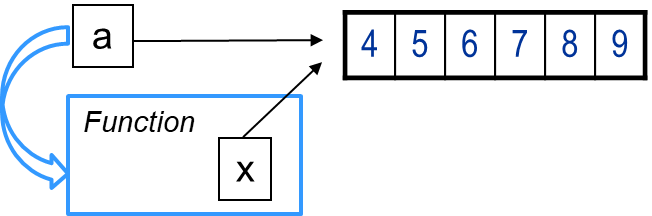

מאחר שרשימה היא אובייקט mutable ו`append` מבצע שינוי של הרשימה עצמה, אז השינוי יופיע גם בa.

```{admonition} **לסיכום:**  באילו דרכים ניתן "להוציא" ערכים מתוך פונקציה?
:class: dropdown, note
אנחנו ראינו שתי דרכים להחזיר מידע מתוך פונקציות:  
1. שימוש במילה השמורה `return`.
2. עריכה של קלטים שהם mutable.

לשם השלמות - ניתן גם להשתמש במשתנים גלובליים על מנת לשמור ערכים, אך הדרך הזו אינה בחומר הקורס (וגם נחשבת לא הכי אלגנטית בקרב מתכנתים).
```